In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, na_values='?')
    data.dropna(inplace=True)
    data['origin'] = data['origin'].astype(int) # Convert 'origin' to integers for mutated_auto.93
    X = data.drop('origin', axis=1)
    y = data['origin']
    return X, y

# Load data
X_orig, y_orig = load_data('../data/auto93.csv')
X_mutated, y_mutated = load_data('../mutated_data/mutated_auto93.csv')



In [20]:
# Feature Scaling
scaler = StandardScaler()
X_orig = scaler.fit_transform(X_orig)
X_mutated = scaler.transform(X_mutated)

In [17]:
# Initialize KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation on original data
orig_scores = cross_val_score(classifier, X_orig, y_orig, cv=5)

# Perform cross-validation on mutated data
mutated_scores = cross_val_score(classifier, X_mutated, y_mutated, cv=5)

# Print mean accuracy scores
print("Mean accuracy on original data:", np.mean(orig_scores))
print("Mean accuracy on mutated data:", np.mean(mutated_scores))

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy on original data: 0.6041869522882182
Mean accuracy on mutated data: 0.5812658227848101


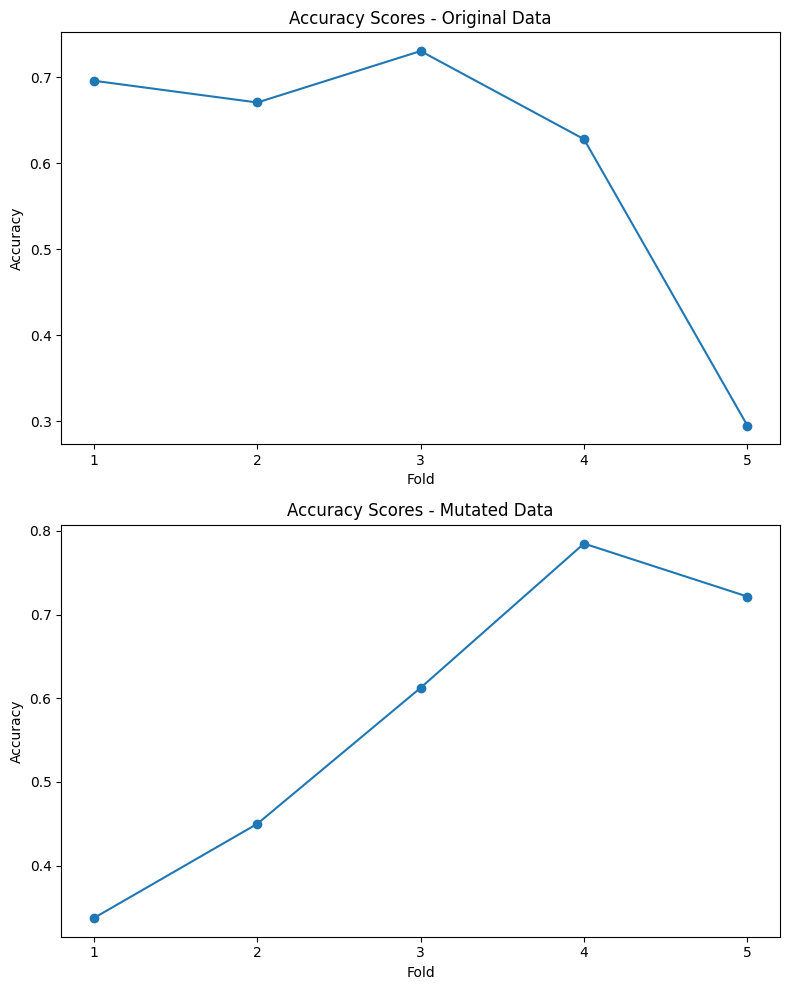

In [22]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot for original data
axes[0].plot(np.arange(1, 6), orig_scores, marker='o', linestyle='-')
axes[0].set_title('Accuracy Scores - Original Data')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(np.arange(1, 6))

# Plot for mutated data
axes[1].plot(np.arange(1, 6), mutated_scores, marker='o', linestyle='-')
axes[1].set_title('Accuracy Scores - Mutated Data')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('Accuracy')
axes[1].set_xticks(np.arange(1, 6))

plt.tight_layout()
plt.show()

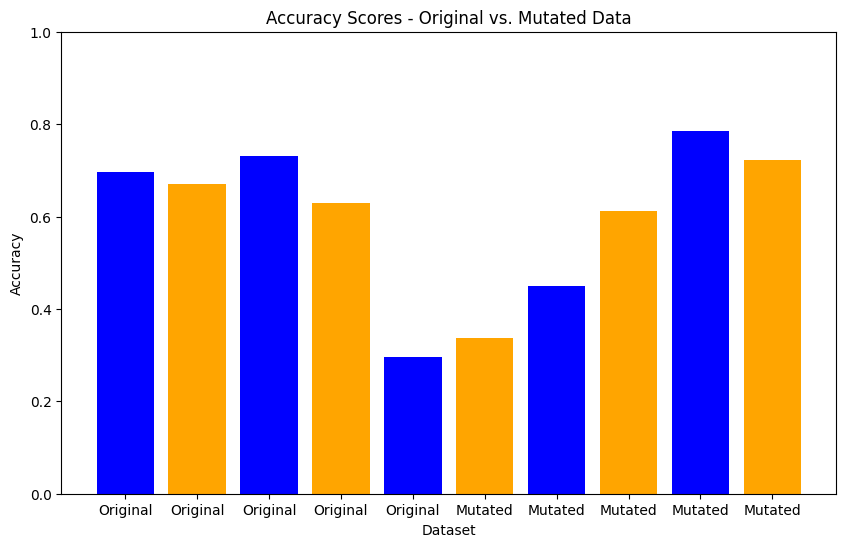

In [23]:
# Combine the scores
all_scores = np.concatenate([orig_scores, mutated_scores])
labels = ['Original'] * len(orig_scores) + ['Mutated'] * len(mutated_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(all_scores) + 1), all_scores, tick_label=labels, color=['blue', 'orange'])
plt.title('Accuracy Scores - Original vs. Mutated Data')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

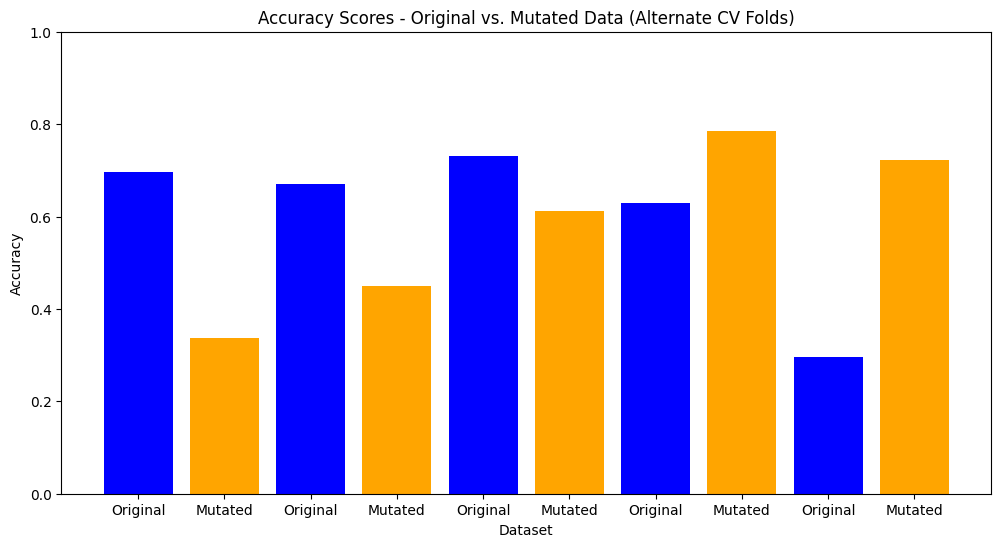

In [24]:
# Combine the scores
all_scores = []
labels = []
for orig_score, mutated_score in zip(orig_scores, mutated_scores):
    all_scores.append(orig_score)
    all_scores.append(mutated_score)
    labels.append('Original')
    labels.append('Mutated')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(np.arange(1, len(all_scores) + 1), all_scores, tick_label=labels, color=['blue', 'orange'])
plt.title('Accuracy Scores - Original vs. Mutated Data (Alternate CV Folds)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()